In [1]:
import pandas as pd
from category_encoders import TargetEncoder

from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from catboost import CatBoostClassifier

# 1. Preliminary Data Analysis

In [2]:
bad_users_data = pd.read_csv('dataset/ya_practicum_bad_users_info.csv')
good_users_data = pd.read_csv('dataset/ya_practicum_good_users_info.csv')
bad_users_event_data =pd.read_csv('dataset/ya_practicum_ltv_bad_users_events_dataset.csv')
good_users_event_data = pd.read_csv('dataset/ya_practicum_ltv_good_users_events_dataset.csv')

In [3]:
bad_users_data.info()
bad_users_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134177 entries, 0 to 134176
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   subscription_hash             134177 non-null  object 
 1   channel                       134177 non-null  object 
 2   first_month_price             134177 non-null  float64
 3   email_domain                  134177 non-null  object 
 4   first_payment_type            106437 non-null  object 
 5   subscription_platform         134177 non-null  object 
 6   signup_platform               116570 non-null  object 
 7   fragrance_family              4665 non-null    object 
 8   scent_profile_title           4665 non-null    object 
 9   shipping_region               134177 non-null  object 
 10  shipping_city                 134177 non-null  object 
 11  is_upgraded_in_first_2_days   134177 non-null  bool   
 12  is_upcharged_in_first_2_days  134177 non-nul

,subscription_hash,channel,first_month_price,email_domain,first_payment_type,subscription_platform,signup_platform,fragrance_family,scent_profile_title,shipping_region,shipping_city,is_upgraded_in_first_2_days,is_upcharged_in_first_2_days,minutes_from_registration,subscription_lifetime,age_tier,sex,income_tier
0,6c6f36cd8eb42ef1d905578a6b0947f534d6132ae1c025...,Channel_3,3.00,0a208c9bd58a3c4a8afd770de83f090fdf74a53de73252...,Card,web,web,NaN,NaN,FL,SPRING HILL,False,False,3,2,45 to 54,female,25 to 49
1,73831634ef6d3639546fbb58f7ea4288220d907600fc9b...,Channel_1,11.21,86f85e9b7d3452597f1ac38acf948196a58ac22cdba276...,Card,web,web,NaN,NaN,PA,PHILADELPHIA,False,True,3,2,Below 18,male,50 to 74
2,75c705c4e9d81bb6037d2383118983f1f8009b6ae203d4...,Channel_1,11.21,b18226564f0740bc4e0785d34af8d56c85e278d32e321d...,NaN,web,web,NaN,NaN,IN,FRANKFORT,False,True,2,1,Below 18,female,25 to 49
3,20bb89aa63a1bc2a2f0c6e435a1da9057e52b6eec113fb...,Channel_3,3.00,86f85e9b7d3452597f1ac38acf948196a58ac22cdba276...,Card,web,web,NaN,NaN,TX,DENTON,False,False,3,1,Below 18,female,25 to 49
4,160647d08b5d29ad4039b58f0c8f6515c29cdc7aae517e...,Channel_1,11.21,86f85e9b7d3452597f1ac38acf948196a58ac22cdba276...,NaN,web,web,NaN,NaN,TX,CONROE,True,False,2,2,Below 18,female,25 to 49


In [4]:
good_users_data.info()
good_users_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134177 entries, 0 to 134176
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   subscription_hash             134177 non-null  object 
 1   channel                       134177 non-null  object 
 2   first_month_price             134177 non-null  float64
 3   email_domain                  134177 non-null  object 
 4   first_payment_type            67889 non-null   object 
 5   subscription_platform         134177 non-null  object 
 6   signup_platform               124801 non-null  object 
 7   fragrance_family              17952 non-null   object 
 8   scent_profile_title           17952 non-null   object 
 9   shipping_region               134177 non-null  object 
 10  shipping_city                 134177 non-null  object 
 11  is_upgraded_in_first_2_days   134177 non-null  bool   
 12  is_upcharged_in_first_2_days  134177 non-nul

,subscription_hash,channel,first_month_price,email_domain,first_payment_type,subscription_platform,signup_platform,fragrance_family,scent_profile_title,shipping_region,shipping_city,is_upgraded_in_first_2_days,is_upcharged_in_first_2_days,minutes_from_registration,subscription_lifetime,age_tier,sex,income_tier
0,b856551ab1ffb13ccf08240d0ed14ed5d8c3103caf74b8...,Channel_1,11.21,86f85e9b7d3452597f1ac38acf948196a58ac22cdba276...,NaN,web,web,"Aromatic fruity, Citrus, Fougere fresh, Watery","Fresh, clean & comfortable",TX,HAMLIN,False,False,5,3,Below 18,male,25 to 49
1,639ec598c19dd1d12d0a91b6b61372f7af16e914d58254...,Channel_1,11.21,b18226564f0740bc4e0785d34af8d56c85e278d32e321d...,NaN,web,web,"Citrus, Floral rose, Floral watery","Fresh, sophisticated & floral",IN,AVON,False,False,7,3,Below 18,female,25 to 49
2,7bbe9554c2302fb6c30160ad265a0afe490763e27de83a...,Channel_1,11.21,86f85e9b7d3452597f1ac38acf948196a58ac22cdba276...,NaN,web,web,"Oriental Gourmand, Fruity","Sweet, creamy & comfortable",MO,MARYLAND HTS,False,False,2356,3,Below 18,female,25 to 49
3,4fb51b0b63f28246533b97a24df7eddb409f45b1e9c2c5...,Channel_1,11.21,86f85e9b7d3452597f1ac38acf948196a58ac22cdba276...,NaN,web,web,"Oriental Floral, Oriental Gourmand, Fruity","Warm, sweet & addictive",NY,BROOKLYN,True,False,8482,3,Below 18,female,50 to 74
4,0c969a59b134670997264eee28c1dd167d4b58f1d7006b...,Channel_1,11.21,86f85e9b7d3452597f1ac38acf948196a58ac22cdba276...,NaN,web,web,"Chypre, Woody spicy","Distinct, sensual & assertive",TN,MEMPHIS,False,False,2,4,Below 18,male,25 to 49


In [5]:
bad_users_event_data.info()
bad_users_event_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938129 entries, 0 to 938128
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   subscription_hash          938129 non-null  object
 1   minutes_from_registration  938129 non-null  int64 
 2   browser_name               938129 non-null  object
 3   browser_family             938129 non-null  object
 4   browser_type               938129 non-null  object
 5   browser_language           634387 non-null  object
 6   os_name                    938129 non-null  object
 7   event_name                 938129 non-null  object
 8   amount_of_events           938129 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 64.4+ MB


,subscription_hash,minutes_from_registration,browser_name,browser_family,browser_type,browser_language,os_name,event_name,amount_of_events
0,5861c3adb9e76ecf95899b8e6b4dfa781ade004723bb0e...,3,Mobile Safari,Safari,Browser (mobile),en-US,Mac OS X (iPhone),page_view,9
1,c193493aa3f5c042329943b77eead40745da259ddcfaf8...,5,Apple WebKit,Apple WebKit,Browser,en-US,Mac OS X (iPhone),page_view,9
2,65ad0f082dba1787ba9077bd51f83f2e8c8c2fa2a9f48b...,315,Chrome Mobile,Chrome,Browser (mobile),en-US,Android Mobile,page_view,3
3,4d306d031dc47e5b7a08fa77d8f9061720a32428846e12...,140,Chrome Mobile,Chrome,Browser (mobile),en-US,Android 8.x,page_view,1
4,2748d9b800754a161f0a88f054ed35a16a6433dcb46eb4...,1,Mobile Safari,Safari,Browser (mobile),en-US,Mac OS X (iPhone),page_view,17


In [6]:
good_users_event_data.info()
good_users_event_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853744 entries, 0 to 853743
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   subscription_hash          853744 non-null  object
 1   minutes_from_registration  853744 non-null  int64 
 2   browser_name               853744 non-null  object
 3   browser_family             853744 non-null  object
 4   browser_type               853744 non-null  object
 5   browser_language           582863 non-null  object
 6   os_name                    853744 non-null  object
 7   event_name                 853744 non-null  object
 8   amount_of_events           853744 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 58.6+ MB


,subscription_hash,minutes_from_registration,browser_name,browser_family,browser_type,browser_language,os_name,event_name,amount_of_events
0,29c44b6e797453abc7a8329e58e30a9f074c81759ed3f8...,3,Unknown,Unknown,unknown,NaN,Unknown,AddToQueue,4
1,2fd1f74ba5b919e484c82eeceb3faf051e8b959c528d28...,0,Chrome,Chrome,Browser,en-US,Windows 10,page_view,2
2,abfebc37c1b0eac7b1f3e3e0eedd72a4d98fb149763e58...,5,Mobile Safari,Safari,Browser (mobile),en-US,iOS 11 (iPhone),page_view,1
3,ba3fa8f9eeb9dad93e96ed33025cc815c663d209403994...,2524,Chrome,Chrome,Browser,en-US,Windows 10,page_view,3
4,dfd42ab97f28db264c2d84fb63d0ede3a4ad5f7dfae2f6...,15,Mobile Safari,Safari,Browser (mobile),es-XL,Mac OS X (iPhone),page_view,5


# Determining Features

## User data

In [7]:
bad_users_data.groupby(['subscription_platform']).size()

subscription_platform
Android         8
iOS            10
web        134159
dtype: int64

In [8]:
bad_users_data.groupby(['signup_platform']).size()

signup_platform
Android        18
iOS            20
web        116532
dtype: int64

In [9]:
bad_users_data.groupby(['sex']).size()

sex
female    106432
male       27745
dtype: int64

In [10]:
good_users_data.groupby(['sex']).size()

sex
female    103272
male       30905
dtype: int64

## User event data

In [11]:
good_users_event_data.groupby(['browser_family']).size()

browser_family
Apple WebKit          87784
Chrome               350116
Firefox                2865
Internet Explorer       321
Microsoft Edge         1290
Mozilla                 503
Opera                    35
Robot/Spider         216492
Safari               139302
Unknown               55036
dtype: int64

In [12]:
bad_users_event_data.groupby(['browser_family']).size()

browser_family
Apple WebKit         102932
Chrome               320062
Firefox                3300
Internet Explorer       512
Microsoft Edge         1951
Mozilla                 163
Opera                    95
Robot/Spider         168360
Safari               205024
Unknown              135730
dtype: int64

In [13]:
good_users_event_data.groupby(['browser_language']).size()

browser_language
agq-CM     4
ain        2
ar         9
ar-EG     10
bg        15
          ..
zh-TW      3
zh-cn     20
zh-hk      5
zun        2
zz-ZZ      6
Length: 99, dtype: int64

In [14]:
good_users_event_data.groupby(['event_name']).size()

event_name
AddToQueue                      220888
LoginFailed                       3815
LoginSuccess                     17004
ReferralRegistration               681
ReferralSubscriptionPurchase       194
RemoveFromQueue                  17417
RestorePassword                   1077
SkipMonth                          194
SubscriptionUpgrade               9572
Unsubscribe                         39
page_view                       582863
dtype: int64

In [15]:
bad_users_event_data.groupby(['event_name']).size()

event_name
AddToQueue                      215953
LoginFailed                       6026
LoginSuccess                     25706
ReferralRegistration               558
ReferralSubscriptionPurchase       182
RemoveFromQueue                  17141
RestorePassword                   1732
SkipMonth                          794
SubscriptionUpgrade               8587
Unsubscribe                      27063
page_view                       634387
dtype: int64


A quick glance at our datasets show a plethora of features. Let's decide which ones to include, and which to exclude.
## User data metrics

### To Include

- **channel**: marketing channel is an important metric
- **first_month_price**: this probably has an impact on customer LTV
- **shipping_region** : probably has an impact on customer LTV, whether direct or indirect. Some examples I can think of is region's shipping cost or sales tax, and region's climate(resulting in frequency of fragrance use)
- **shipping_city** : same as above
- **is_upgraded_in_first_2_days** : cost is a useful metric
- **is_upcharged_in_first_2_days** : same as above
- **age_tier**: useful categorical variable
- **income_tier**: another useful categorical variable

### To exclude

- **subscription_hash**: primary key(customer identifier)
- **email_domain**: irrelevant data for our model
- **first_payment_type**: probably won't impact our model
- **subscription_platform**: almost 100% of users subscribe through web, so this is a useless metric.
- **signup_platform**: same as subscription_platform.
- **fragrance_family**: too little data, most are NaN
- **scent_profile_title**: same reason as fragrance_family
- **minutes_from_registration**: not sure why this matters
- **subscription_lifetime**: this metric is just used to categorize our data as good/bad.
- **sex**: the proportion of males to females in our good/bad data is virtually identical - including sex won't be very useful in our model, unless we can determine it's a confounding variable for another metric, in which case we'll combine the two metrics to create a more useful feature.

## User event data metrics:

### To exclude

- **minutes_from_registration**: 
- **browser_name, browser_family, browser_type, browser_language, os_name**: useless data. Distributions in each metric are virtually the same for both good and bad data.
- **browser_language**: same as above
- **browser_language**: same as above

The only data we really need to care about here is **event_name** and **amount_of_events**. Let's make some observations based on the event name.

- **AddToQueue**: about the same for both good and bad, high frequency of occurrence
- **LoginFailed/LoginSuccess**: We see some differences but the proportion is about the same for both good/bad.
- **ReferralRegistration**: about the same
- **ReferralSubscriptionPurchase**: ^
- **RemoveFromQueue**: ^
- **RestorePassword**: ^
- **SkipMonth**: bad users have more skip month events.
- **SubscriptionUpgrade**: about the same
- **Unsubscribe**: bad users have significantly more unsubscribe events(obviously)
- **page_view**: about the same % wise, high frequency of occurrence

based on our observations, we should count **amount_of_events** based on **AddToQueue**, and **page_view** event names since those events appear the most frequently. 

*We could add unsubscribe events to our model, and add a weight to that, since most users(99.9%) that have this event are considered bad users. This would definitely improve our training model, but when put in production this metric would probably be useless in predicting whether or not a customer will unsubscribe; quite obviously this event probably won't appear until a user decides to unsubscribe. Makes no sense to try to predict something that already occurred.*



# 2. Data Preparation

In [16]:
#concatenate the data
full_event_data = pd.concat([bad_users_event_data, good_users_event_data], ignore_index=True)
#check
full_event_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1791873 entries, 0 to 1791872
Data columns (total 9 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   subscription_hash          object
 1   minutes_from_registration  int64 
 2   browser_name               object
 3   browser_family             object
 4   browser_type               object
 5   browser_language           object
 6   os_name                    object
 7   event_name                 object
 8   amount_of_events           int64 
dtypes: int64(2), object(7)
memory usage: 123.0+ MB


In [17]:
#retrieve all users that unsubbed
unsubs = full_event_data[full_event_data['event_name']=='Unsubscribe'][['subscription_hash']]

unsubs.info()

unsubs['Unsubscribe'] = True

unsubs.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27102 entries, 56 to 1790262
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_hash  27102 non-null  object
dtypes: object(1)
memory usage: 423.5+ KB


,subscription_hash,Unsubscribe
56,c7585d77a9067dd6a643d5b0a68746b98ba1bcbaff97db...,True
199,36ed6d2886d1b9a474ecd86a861e0bdc6de9acb8141ad7...,True
263,8b7a733f1218917c56933860e3feb5abaa114b7dcfb613...,True
348,dfa4a8dc35e7c3508c8b1769f187052f34de3fbee48cb6...,True
543,8102f2a7a08310ce02ca9f4655c4215576732ca38ce9c9...,True


In [18]:
#count add_to_queue and page_view events for each user
useful_events = ['AddToQueue', 'page_view']

event_counts = full_event_data[full_event_data['event_name'].isin(useful_events)][['subscription_hash', 'amount_of_events']]

event_counts = event_counts.groupby('subscription_hash').agg('sum')

event_counts.info()
event_counts.head()

<class 'pandas.core.frame.DataFrame'>
Index: 232842 entries, 0000379144f24717a8d124d798008a0e672d93d4a95841fd2ea3d52f2a72353c to ffffec4c20ba0813cadcec3879f720ac74e7412869a2a23745164e71cdecf035
Data columns (total 1 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   amount_of_events  232842 non-null  int64
dtypes: int64(1)
memory usage: 3.6+ MB


,amount_of_events
subscription_hash,
0000379144f24717a8d124d798008a0e672d93d4a95841fd2ea3d52f2a72353c,44
0000b9f233f8e7b4b12e6085e05dba3e8f8baff01c73da042e5277870a07b8cf,6
0000d42bc906ab38913acd0442e2c69960767bfc6ec6df48036e15f4f79632be,7
000117e88502b1675000325934250c33b9f3ba2cbcd75af5aba17852749cffcd,1
000138229cb3f3f4d53b14b4e5412cd082139a2370f8d61fd0b503cf139813ce,1


In [19]:
#create our target column
bad_users_data['target'] = 0
good_users_data['target'] = 1

#concatenate the data
user_data = pd.concat([bad_users_data, good_users_data], ignore_index=True)
#check
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268354 entries, 0 to 268353
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   subscription_hash             268354 non-null  object 
 1   channel                       268354 non-null  object 
 2   first_month_price             268354 non-null  float64
 3   email_domain                  268354 non-null  object 
 4   first_payment_type            174326 non-null  object 
 5   subscription_platform         268354 non-null  object 
 6   signup_platform               241371 non-null  object 
 7   fragrance_family              22617 non-null   object 
 8   scent_profile_title           22617 non-null   object 
 9   shipping_region               268354 non-null  object 
 10  shipping_city                 268354 non-null  object 
 11  is_upgraded_in_first_2_days   268354 non-null  bool   
 12  is_upcharged_in_first_2_days  268354 non-nul

In [20]:
#merge data
full_data = user_data.merge(event_counts, on='subscription_hash', how='right').merge(unsubs, on='subscription_hash', how='left')
full_data['Unsubscribe'] = full_data['Unsubscribe'].fillna(False)
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237164 entries, 0 to 237163
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   subscription_hash             237164 non-null  object 
 1   channel                       237164 non-null  object 
 2   first_month_price             237164 non-null  float64
 3   email_domain                  237164 non-null  object 
 4   first_payment_type            147316 non-null  object 
 5   subscription_platform         237164 non-null  object 
 6   signup_platform               219292 non-null  object 
 7   fragrance_family              21275 non-null   object 
 8   scent_profile_title           21275 non-null   object 
 9   shipping_region               237164 non-null  object 
 10  shipping_city                 237164 non-null  object 
 11  is_upgraded_in_first_2_days   237164 non-null  bool   
 12  is_upcharged_in_first_2_days  237164 non-nul

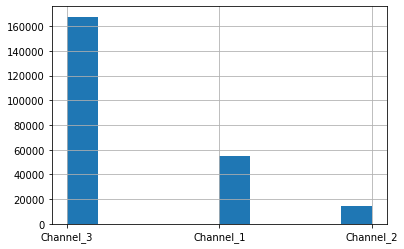

In [21]:
#check for abnormalities
full_data['channel'].hist()

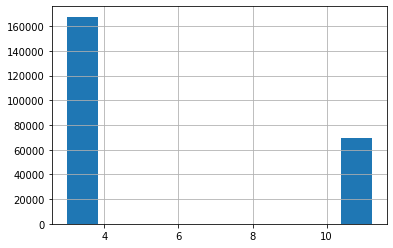

In [22]:
#check for abnormalities
full_data['first_month_price'].hist()

In [23]:
features = ['channel', 'first_month_price', 
            'shipping_region', 'shipping_city', 'is_upgraded_in_first_2_days', 'is_upcharged_in_first_2_days',
           'age_tier', 'income_tier', 'amount_of_events', 'Unsubscribe']
unused_features = ['subscription_hash', 'email_domain', 'first_payment_type', 'subscription_platform', 'signup_platform', 
                   'fragrance_family', 'scent_profile_title', 'minutes_from_registration', 'subscription_lifetime', 'sex']

ml_data = full_data.drop(unused_features, axis=1)
ml_data.info()
ml_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237164 entries, 0 to 237163
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   channel                       237164 non-null  object 
 1   first_month_price             237164 non-null  float64
 2   shipping_region               237164 non-null  object 
 3   shipping_city                 237164 non-null  object 
 4   is_upgraded_in_first_2_days   237164 non-null  bool   
 5   is_upcharged_in_first_2_days  237164 non-null  bool   
 6   age_tier                      237164 non-null  object 
 7   income_tier                   237164 non-null  object 
 8   target                        237164 non-null  int64  
 9   amount_of_events              237164 non-null  int64  
 10  Unsubscribe                   237164 non-null  bool   
dtypes: bool(3), float64(1), int64(2), object(5)
memory usage: 17.0+ MB


,channel,first_month_price,shipping_region,shipping_city,is_upgraded_in_first_2_days,is_upcharged_in_first_2_days,age_tier,income_tier,target,amount_of_events,Unsubscribe
0,Channel_3,3.00,FL,SPRING HILL,False,False,45 to 54,25 to 49,0,14,False
1,Channel_1,11.21,PA,PHILADELPHIA,False,True,Below 18,50 to 74,0,19,False
2,Channel_1,11.21,PA,PHILADELPHIA,True,True,Below 18,50 to 74,0,19,False
3,Channel_1,11.21,IN,FRANKFORT,False,True,Below 18,25 to 49,0,20,False
4,Channel_3,3.00,TX,DENTON,False,False,Below 18,25 to 49,0,35,False


In [24]:
#convert categorical to numerical
categorical = ['channel', 'shipping_region', 'shipping_city', 'age_tier', 'income_tier']

#using target encoding instead of OHE due to number of categories in shipping_region and shipping_city
target_encoder = TargetEncoder(cols=categorical, return_df=True)
ml_data_te = target_encoder.fit_transform(ml_data, ml_data['target'])
ml_data_te.head()

,channel,first_month_price,shipping_region,shipping_city,is_upgraded_in_first_2_days,is_upcharged_in_first_2_days,age_tier,income_tier,target,amount_of_events,Unsubscribe
0,0.497604,3.00,0.484747,0.467626,False,False,0.577273,0.514316,0,14,False
1,0.525521,11.21,0.505602,0.539908,False,True,0.503380,0.499384,0,19,False
2,0.525521,11.21,0.505602,0.539908,True,True,0.503380,0.499384,0,19,False
3,0.525521,11.21,0.507090,0.589474,False,True,0.503380,0.514316,0,20,False
4,0.497604,3.00,0.501092,0.439024,False,False,0.503380,0.514316,0,35,False


In [25]:
#split train and test
df_train, df_test = train_test_split(ml_data_te, test_size=0.25, random_state=12345)

features_train = df_train.drop('target', axis=1)
target_train = df_train['target']

features_test = df_test.drop('target', axis=1)
target_test = df_test['target']

In [26]:
#scale numeric features
numeric = ['first_month_price']

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

features_train.head()

,channel,first_month_price,shipping_region,shipping_city,is_upgraded_in_first_2_days,is_upcharged_in_first_2_days,age_tier,income_tier,amount_of_events,Unsubscribe
205271,0.497604,-0.643142,0.470188,0.547826,False,False,0.50338,0.467018,6,False
56099,0.497604,-0.643142,0.519066,0.595238,False,False,0.50338,0.514316,93,False
232977,0.497604,-0.643142,0.522825,0.502513,False,False,0.50338,0.514316,6,False
71072,0.497604,-0.643142,0.498222,0.454545,False,False,0.50338,0.499384,3,True
34883,0.525521,1.554867,0.491577,0.355932,False,False,0.50338,0.499384,20,False


# 3. Testing Models

In [27]:
model = LogisticRegression(random_state=12345, solver='liblinear')

model.fit(features_train, target_train)

prediction = model.predict(features_test)

f1_score_lr = f1_score(target_test, prediction)

print('F1 score using logistic regression:', f1_score_lr)

#get class probability
probabilities_valid = model.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]

#measure AUC-ROC
auc_roc = roc_auc_score(target_test, probabilities_one_valid)

print("AUC-ROC score:", auc_roc)

F1 score using logistic regression: 0.7102762613275395
AUC-ROC score: 0.6976900020477236


In [28]:
model = DecisionTreeClassifier(random_state=12345, max_depth=6)

model.fit(features_train, target_train)

prediction = model.predict(features_test)

f1_score_dt = f1_score(target_test, prediction)

print('F1 score using decision tree classifier:', f1_score_dt)

#get class probability
probabilities_valid = model.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]

#measure AUC-ROC
auc_roc = roc_auc_score(target_test, probabilities_one_valid)

print("AUC-ROC score:", auc_roc)

F1 score using decision tree classifier: 0.7232416102974978
AUC-ROC score: 0.693761217853496


In [29]:
model = RandomForestClassifier(random_state=123,n_estimators=10)

model.fit(features_train, target_train)

prediction = model.predict(features_test)

f1_score_rf = f1_score(target_test, prediction)

print('F1 score using random forest classifier:', f1_score_rf)

#get class probability
probabilities_valid = model.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]

#measure AUC-ROC
auc_roc = roc_auc_score(target_test, probabilities_one_valid)

print("AUC-ROC score:", auc_roc)

F1 score using random forest classifier: 0.607931537616604
AUC-ROC score: 0.6503816751758595


In [46]:
#create train and test sets without one hot encoding
features = ml_data.drop('target', axis=1)
target = ml_data['target']
features_train_cb, features_test_cb, target_train_cb, target_test_cb = train_test_split(features, target, test_size=0.25, random_state=12345)

model = CatBoostClassifier(iterations=30, 
                           depth=6,
                           learning_rate=.1,
                           verbose=True)

model.fit(features_train_cb, target_train_cb, cat_features=categorical)

prediction = model.predict(features_test_cb)

f1_score_cb = f1_score(target_test_cb, prediction)

print('F1 score using gradient boosting:', f1_score_cb)

#get class probabilities
preds_proba = model.predict_proba(features_test_cb)
probabilities_one_valid = preds_proba[:, 1]

#measure AUC-ROC
auc_roc = roc_auc_score(target_test_cb, probabilities_one_valid)

print("AUC-ROC score:", auc_roc)

0:	learn: 0.6807927	total: 96.6ms	remaining: 2.8s
1:	learn: 0.6706403	total: 207ms	remaining: 2.9s
2:	learn: 0.6622137	total: 362ms	remaining: 3.26s
3:	learn: 0.6551543	total: 493ms	remaining: 3.2s
4:	learn: 0.6489862	total: 681ms	remaining: 3.41s
5:	learn: 0.6436976	total: 793ms	remaining: 3.17s
6:	learn: 0.6392314	total: 920ms	remaining: 3.02s
7:	learn: 0.6352550	total: 1.09s	remaining: 3.01s
8:	learn: 0.6319003	total: 1.24s	remaining: 2.89s
9:	learn: 0.6289757	total: 1.34s	remaining: 2.67s
10:	learn: 0.6262891	total: 1.51s	remaining: 2.61s
11:	learn: 0.6238980	total: 1.7s	remaining: 2.55s
12:	learn: 0.6218750	total: 1.85s	remaining: 2.41s
13:	learn: 0.6200781	total: 1.97s	remaining: 2.25s
14:	learn: 0.6185197	total: 2.06s	remaining: 2.06s
15:	learn: 0.6171425	total: 2.16s	remaining: 1.89s
16:	learn: 0.6159185	total: 2.27s	remaining: 1.73s
17:	learn: 0.6148100	total: 2.36s	remaining: 1.57s
18:	learn: 0.6137994	total: 2.49s	remaining: 1.44s
19:	learn: 0.6128602	total: 2.72s	remaining:

After including the event data, our decision tree model still gives the best result with an F1 score of about .72, and an AUC-ROC score of about .69; our gradient boosting model performs similarly with an F1 score of about .73, and an AUC-ROC score of about .65. Our model now predicts much better, and has a high measure of separability. 